In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data=pd.read_csv('/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
X=data.drop(['diabetes','gender','smoking_history'],axis=1)
y=data['diabetes']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,y_train.shape

((80000, 6), (80000,))

In [14]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [15]:
model=Sequential([
    Dense(16,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9173 - loss: 0.2078 - val_accuracy: 0.9599 - val_loss: 0.1122
Epoch 2/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9633 - loss: 0.1062 - val_accuracy: 0.9646 - val_loss: 0.1011
Epoch 3/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9667 - loss: 0.0974 - val_accuracy: 0.9686 - val_loss: 0.0926
Epoch 4/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9690 - loss: 0.0908 - val_accuracy: 0.9703 - val_loss: 0.0902
Epoch 5/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9703 - loss: 0.0860 - val_accuracy: 0.9707 - val_loss: 0.0877
Epoch 6/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9710 - loss: 0.0860 - val_accuracy: 0.9718 - val_loss: 0.0855
Epoch 7/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9708 - loss: 0.0850 - val_accuracy: 0.9718 - val_loss: 0.0843
Epoch 8/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9707 - loss: 0.0

In [19]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f'Test Loss {loss}')
print(f'Test accuracy {accuracy}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9720 - loss: 0.0814
Test Loss 0.08183545619249344
Test accuracy 0.9720500111579895


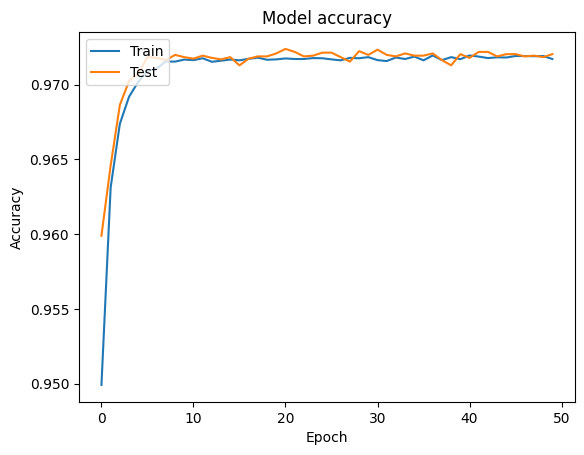

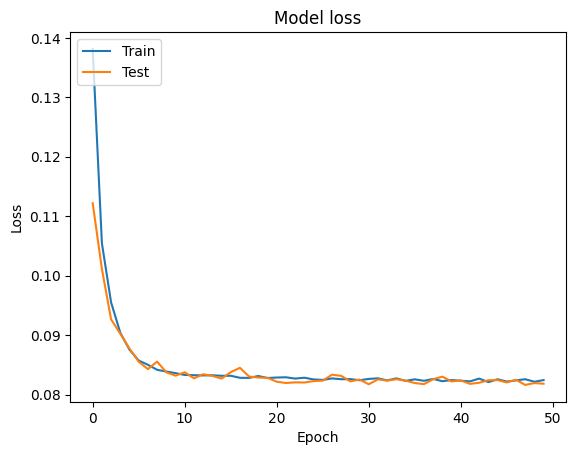

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
